      Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0                23          84                  Low                High   
1                19          64                  Low              Medium   
2                24          98               Medium              Medium   
3                29          89                  Low              Medium   
4                19          92               Medium              Medium   
...             ...         ...                  ...                 ...   
6602             25          69                 High              Medium   
6603             23          76                 High              Medium   
6604             20          90               Medium                 Low   
6605             10          86                 High                High   
6606             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
0                     

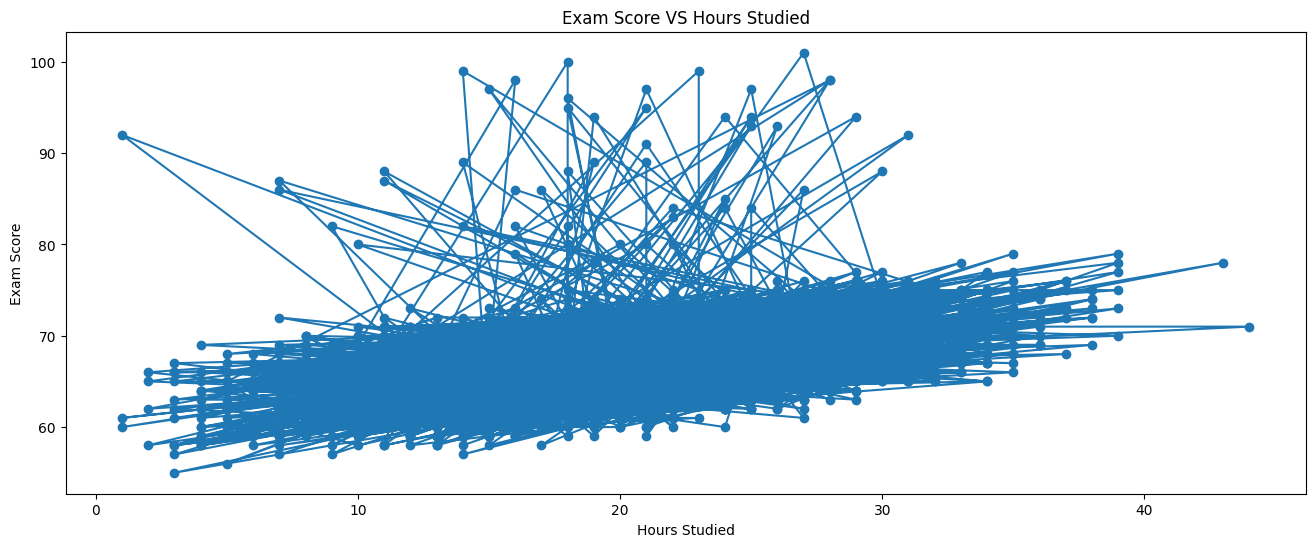

Coefficient:  [ 0.29583382  0.19868938 -0.01282938  0.04851359  0.48277682  0.20022405
 -2.01234139 -1.03853331 -2.05032244 -1.01082453  0.56672263 -1.10729809
 -0.59888074  0.9006084  -1.14852255 -0.62083425 -1.05051238 -0.60615018
  0.04895936  0.56186729  1.01488049 -0.87048418 -0.47620465  0.52157639
  0.30496393  0.84182865 -0.01080161]
Intercept:  42.04885022472007

Linear Regression
Mean Absolute Error:  0.48728723427430676
Mean Square Error:  4.173262062207911
Root Mean Square Error:  2.042856348891892
R² Scores:  0.7314386522127074

Polynomial Regression:
Mean Absolute Error:  0.7307692240705944
Mean Square Error:  4.619425030502745
Root Mean Square Error:  2.1492847718491714
R² Scores:  0.7027267893313609

Result with Reduced Features:
R² Scores:  0.6149466732668671


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Loading File

df = pd.read_csv("StudentPerformanceFactors.csv")
print(df)

# Cleaning Data

df = df.dropna()
df = df.drop_duplicates()

# Visualizing Data

plt.figure(figsize=(16,6))
plt.plot(df["Hours_Studied"], df["Exam_Score"], marker = 'o')
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Exam Score VS Hours Studied")
plt.show()

# Converting to Numeric Labels

df = pd.get_dummies(df, drop_first= True)

# Splitting Data

X = df.drop(columns= ["Exam_Score"])
y = df["Exam_Score"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= 0.2, random_state=42
)

# Linear Regression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Coefficient: ", model.coef_)
print("Intercept: ", model.intercept_)

print("\nLinear Regression")
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Mean Square Error: ", mean_squared_error(y_test, y_pred))
print("Root Mean Square Error: ", rmse)
print("R² Scores: ", r2_score(y_test, y_pred))

# Polynomial Regression (For Degree 2, Quadratic)

poly_model = make_pipeline(PolynomialFeatures(degree = 2), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

print("\nPolynomial Regression:")  # Didn't Improved Performance, Slightly worse than Linear Regression
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred_poly))
print("Mean Square Error: ", mean_squared_error(y_test, y_pred_poly)) 
print("Root Mean Square Error: ", rmse_poly)
print("R² Scores: ", r2_score(y_test, y_pred_poly))

# Experimenting with Different Features

X_new = df[["Hours_Studied", "Attendance", "Sleep_Hours", "Previous_Scores", "Tutoring_Sessions", "Physical_Activity", "Internet_Access_Yes"]]
y_new = df["Exam_Score"]

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new, y_new, test_size= 0.2, random_state= 42
)

model_2 = LinearRegression()
model_2.fit(X_train_new, y_train_new)
y_pred_new = model_2.predict(X_test_new)

print("\nResult with Reduced Features:")
print("R² Scores: ", r2_score(y_test_new, y_pred_new)) # Reduced Accuracy which shows other factors contained useful information